<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" style="float: right; margin-right: 30px;" width="200"/> 
<font size="6.9" color="8C3061"><b>Curso de Optimización</b></font> <br>
<font size="4.5" color="8C3061"><b>Tarea 5 - Método de Región de Confianza</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
MSc en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>


# <font color="8C3061" >**Cargar Librerías**</font> 

In [1]:
# load libraries
import numpy as np
import scipy.optimize as opt
from typing import Tuple, Callable

# load module Opti_functions
from opti_functions import Opti_functions as opti

# load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<div class="alert alert-block alert-info">
<b>Nota:</b> El lenguage de programación símbolica Wolfram Mathematica va a ser usado recurrentemente en esta tarea para facilitar los cálculos algebraicos. Se copiara el código en una celda de Markdown para que se pueda copiar y reproducir en <a href="https://www.wolframcloud.com/">https://www.wolframcloud.com/</a> si se tiene cuenta.  </div>
</div>

# <font color="8C3061" >**Ejercicio 1 (2.5 puntos)**</font>

1. Encuentre y clasifique los puntos estacionarios para la función

$$ f(\mathbf{x}) = x_1^2 - x_2^2 + x_3^2 - 2x_1x_3 - x_2x_3 + 4x_1 + 12. $$

2. Sea $\mathbf{x}_0 = (1,0,0)^\top$. Calcule el punto $\mathbf{x}_1$ 
   usando la dirección de descenso máximo con paso exacto.

**Solución:**

<b><i>Parte 1:</i></b><br><br>
La función $f$ se puede expresar como $f(\mathbf{x})=\frac{1}{2}\mathbf{x}^{\top}A\mathbf{x}-b^{\top}\mathbf{x}+12$, donde la matriz $A$ y el vector $b$ son:

$$A=
2 \cdot \begin{bmatrix}
1 & 0 & -1 \\
0 & -1 & -\frac{1}{2} \\
-1 & -\frac{1}{2} & 1
\end{bmatrix} \qquad b = \begin{bmatrix}
-4 \\
0 \\
0
\end{bmatrix}
$$

Implementemos la función $f$ y su gradiente:

In [2]:
A =2*np.array([[1,0,-1],[0,-1,-1/2],[-1,-1/2,1]])
b = np.array([-4,0,0])

f = lambda x: 0.5*x.T@A@x - b.T@x+12
grad_f = lambda x: A@x-b



Luego, el gradiente es:
 $$\nabla f(\mathbf{x}) = A\mathbf{x}^{\top}-b$$

Por tanto, el punto estacionario es:
$$\mathbf{x}^{*} = A^{-1}b^{\top} = (-10,   4,  -8)$$

In [3]:
x_est = np.linalg.solve(A,b)
print("Punto Estacionario:",x_est)

Punto Estacionario: [-10.   4.  -8.]


Los menores principales de la matriz $A$ son:

In [4]:
print("Menores Principales:",np.linalg.det(A[:1,:1]),np.linalg.det(A[:2,:2]),np.linalg.det(A))

Menores Principales: 2.0 -4.0 -2.0


Así por el criterio de Criterio de Sylvester el punto estacionario es un punto de silla, ya que no sucede que los menores principales de índice par son mayores que 0 y los de índice impar son menores que 0, ni tampoco todos son positivos.

<b><i>Parte 2:</i></b><br><br>

La función 

$$\phi(\alpha)=f(\mathbf{x}_0-\alpha\nabla f(x_0))=64\alpha ^{2}-40\alpha+17$$

es convexa en $[0,1]$. Su derivada es $\phi'(\alpha)= -40+128\alpha$, lo que conlleva a que el tamaño de paso exacto es $\alpha_0 = 40/128 = 0.3125$.

Así, $\mathbf{x}_1$ es:

$$\mathbf{x}_{1}=\mathbf{x}_0-\alpha_0\boldsymbol{g}_0$$

In [5]:
x0 = np.array([1,0,0])
g0 = grad_f(x0)
alpha0 = 0.3125
x1 = x0 - alpha0*g0
print("alpha\t:",alpha0)
print("x1\t:",x1)

alpha	: 0.3125
x1	: [-0.875  0.     0.625]


La función $\phi$ se calcula mediante el lenguage de programación símbolica Wolfram Mathematica. Su código es:

Código de *Wolfram Mathematica*:

```mathematica
A = 2*{{1,0,-1},{0,-1,-1/2},{-1,-1/2,1}};
b={-4,0,0};
f[x_]:= 0.5 * Transpose[x].A.x - Transpose[b].x + 12
gradf[x_]:=A.x - Transpose[b]
Expand[f[{1,0,0}-a*gradf[{1,0,0}]]]
```

---

# <font color="8C3061" >**Ejercicio 2 (2.5 puntos)**</font>

Considere la función

$$ f(\mathbf{x}) = 2x_1^2 + x_2^2 - 2x_1x_2 + 2x_1^3 + x_1^4 $$

Sea $\mathbf{x}_0 = (0,1)^\top$

1. Aplique un paso del método de Newton a partir del punto si la Hessiana
   en $\mathbf{x}_0$ es definida positiva. Si no, aplique el algoritmo 
   de descenso máximo con un tamaño de paso apropiado.
2. Calcule el cambio de la función objetivo: $f(\mathbf{x}_1) - f(\mathbf{x}_0)$.

**Solución:**

<b><i>Parte 1:</i></b><br><br>
El gradiente de $f$ es:

$$\nabla f(\mathbf{x})=(4x_1+6x_1^2+4x_1^3-2x_2,-2x_1+2x_2)$$

La matriz Hessiana de $f$ es:

$$\nabla^2 f(\mathbf{x})= \begin{bmatrix}
4 + 12x + 12x^2 & -2 \\
-2 & 2 \\
\end{bmatrix}
$$

En partícular,

$$\nabla^2 f(\mathbf{x}_0)=\begin{bmatrix}
4 & -2 \\
-2 & 2 \\
\end{bmatrix}$$

Esta matriz es definida positiva ya que sus menores principales son positivos, $\det(H_1)=4$ y $\det(H_2)=4$.

In [6]:
f = lambda x: 2 * x[0]**2 + x[1]**2 - 2 * x[0] * x[1] + 2 * x[0]**3 + x[0]**4
grad_f = lambda x: np.array([4*x[0] - 2*x[1] + 6*x[0]**2 + 4*x[0]**3, 2*x[1] - 2*x[0]])
hess_f = lambda x: np.array([[4 + 12*x[0]**2 + 12*x[0], -2], [-2, 2]])

Paso de Newton:

In [7]:
x0 = np.array([0.,1.])
x1 = x0 - np.linalg.inv(hess_f(x0))@grad_f(x0)
print("x0:",x0)
print("x1:",x1)

x0: [0. 1.]
x1: [0. 0.]


<b><i>Parte 2:</i></b><br><br>
Cambio de la función objetivo:

In [8]:
print("Diferencia:",f(x0)-f(x1))

Diferencia: 1.0


---

# <font color="8C3061" >**Ejercicio 3 (2.0 puntos)**</font>

Supongamos que $f_1, f_2: \mathbb{R}^n \rightarrow \mathbb{R}$ son funciones convexas.
   
1. Muestre que también es convexa la función $f(\mathbf{x})$ 
   definida como
   
$$ f(\mathbf{x}) = \max\{f_1(\mathbf{x}), f_2(\mathbf{x}) \}. $$

2. Si $n=1$ y $f_1(-0.4) = 0.36$,
   $f_1(0.6) = 2.56$, $f_2(-0.4) = 3.66$ y $f_2(1) = 2$, identifique 
   el intervalo más pequeño en el que se puede garantizar que se 
   encuentra el minimizador de la función $f(x)$. 
   Explique su respuesta.

**Solución:**

<b><i>Parte 1:</i></b><br><br>
Sean $x,y\in \mathbb{R}^n$ y $\alpha\in[0,1]$. Tenemos que existe $s\in\{1,2\}$ tal que $f(\alpha x+(1-\alpha)y)=f_s(\alpha x+(1-\alpha)y)$.  Así,

$$
\begin{align*}
f(\alpha x+(1-\alpha)y) &= f_s(\alpha x+(1-\alpha)y)\\
&\leq \alpha f_s(x) +(1-\alpha)f_s(y) \qquad \text{(Convexidad de }f_s)\\
&\leq \alpha f(x) +(1-\alpha)f(y) \qquad \quad (f_s\leq f)\\
\end{align*}
$$

Por tanto, la función $f$ es una función convexa.

<b><i>Parte 2:</i></b><br><br>
Consideremos las rectas:

$l_1:=  y=2.2x + 1.24 $ <br>
$l_2:=  y=-1.186x + 3.186$

La recta $l_1$ pasa por los extremos dados de $f_1$ y $l_2$ por los extremos de $f_2$


In [9]:
intercept_1 = opt.root(lambda x: abs(2.2*x + 1.24 -(-1.186*x + 3.186)),0.6).x
print("Intercepto:",intercept_1[0])

Intercepto: 0.574719432959244


La intercepción entre las rectas es:

$a = 0.5747$

Para un mejor tratamiento de la función $f$ visualicemos la función a traves de las rectas $l_1$ y $l_2$.

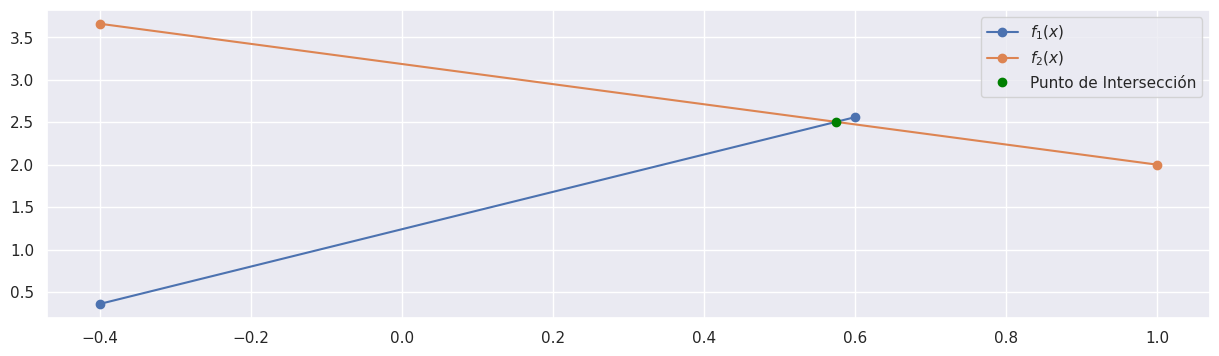

In [10]:
plt.figure(figsize=(15,4))
plt.plot([-0.4,0.6],[0.36,2.56],'o-',label='$f_1(x)$')
plt.plot([-0.4,1],[3.66,2],'o-',label='$f_2(x)$')
plt.plot([intercept_1[0]],[2.2*intercept_1[0] + 1.24],'o',color='green',label='Punto de Intersección')
plt.legend()
plt.show()

Tenemos que la función $f$ es acotada por $l_2$ en $[-0.4,a]$, esto viene a que $f_2$ y $f_1$ están por debajo de $l_2$. Siguiendo un razonamiento similar, en $[a,0.6]$ la función $f$ está acotada por $l_1$.

De esto y los datos dados de $f_1$ y $f_2$, tenemos que $f(-0.4)=3.66$,  $f(0.6)=2.56$ y $f(a)\leq 2.51$, el valor de 2.51 es el valor de $y$ en la intercepción. 

Podemos deducir que para $c>0.6$ se satisface que $f(c)> f(0.6)$, ya que existe $\alpha\in[0,1]$ tal que $0.6 =\alpha a +(1-\alpha)c$, de modo que 
$$f(0.6)\leq \alpha f(a) +(1-\alpha)f(c)< \alpha f(0.6) +(1-\alpha)f(c)$$
COn lo que  $f(c)> f(0.6)$. Con un razonamiento análogo se muestra que si $c<-0.4$,se satisface que $f(c)>f(-0.4)$. De modo que el minimizador se encuentra en $[-0.4,0.6]$.

<center>
<img src="punto3.jpeg"
     style="float: center; margin-right: 30px;" 
     width="500"
     />
</center>



En la anterior imagen se evidencia que para casos particulares de funciones $f$ el mínimo puede estar en los subintervalos $[a,0.6]$ y  $[-0.4,a]$. De modo, que no se puede reducir los intervalos sin tener más información de $f$.

---

# <font color="8C3061" >**Ejercicio 4 (3.0 puntos)**</font>

Programe el método de región de confianza (MRC) que usa como 
aproximación del subproblema de optimización al punto de Cauchy,
descrito en la Clase 13 en el Algoritmo 3.


1. Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, en 
   la función que implementa el algoritmo se crea un arreglo $\mathbf{M}$  
   en el que se guarda los puntos $\mathbf{x}_0, \mathbf{x}_1,
   ..., \mathbf{x}_k$ generados. Si $n>2$, definir $\mathbf{M}$ como $None$.

   La función debe devolver el último valor $k$, $\mathbf{x}_k$, 
   $\mathbf{g}_k$ y  $\mathbf{M}$.

2. Pruebe el algoritmo en la siguientes funciones, fijando 
   la cantidad de iteraciones máximas $N=50000$, $\Delta_{\min}=10^{-5}$, $\eta=0.25$
   y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   excepto para la función Hartmann para la cual es mejor usar una tolerancia más 
   grande, como $\tau = \sqrt{n}\epsilon_m^{1/3}$.
   Use los puntos iniciales siguientes y pruebe dos valores para el radio de 
   la región de confianza $\Delta_{\max}=4$ y $\Delta_{\max}=0.25$.
   

**Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$


**Función de Beale**
- $\mathbf{x}_0 = (2,3)$  


**Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 


**Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 


En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.
  
  
### Solución:

<b><i>Parte 1:</i></b>

In [11]:
def m_k (x, p, f, grad_f, hess_f):
    return f(x) + grad_f(x).T@p + 0.5*p.T@hess_f(x)@p

def trust_region_method(f:Callable[[np.ndarray],float], 
                        grad:Callable[[np.ndarray],np.ndarray], 
                        hess:Callable[[np.ndarray],np.ndarray], 
                        x0:np.ndarray, 
                        max_iter:int, 
                        tol:float, 
                        r_max:float, 
                        r_min:float, 
                        eta:float)->Tuple[int,np.ndarray,np.ndarray,bool,np.ndarray]:
      
    """ Trust region method with Cauchy point for unconstrained optimization.
    
    :param f: function to minimize (Callable[[np.ndarray],float])
    :param grad: gradient of the function (Callable[[np.ndarray],np.ndarray])
    :param hess: Hessian of the function (Callable[[np.ndarray],np.ndarray])
    :param x0: initial point (np.ndarray)
    :param max_iter: maximum number of iterations (int)
    :param tol: tolerance for the stopping criterion (float)
    :param r_max: maximum trust region radius (float)
    :param r_min: minimum trust region radius (float)
    :param eta: parameter for the acceptance criterion (float)

    :return: Tuple with the following elements:
        - k: number of iterations (int)
        - x: approximate minimum of the function (np.ndarray)
        - grad_x: gradient of the function at x (np.ndarray)
        - success: True if the method converged, False otherwise (bool)
        - seq: sequence of iterates generated by the method (np.ndarray)
    """
    
    x = x0
    n = len(x0)
    if n==2:
        seq_points = np.array([x])
    
    e_maq = np.finfo(float).eps
    r_0 = 1/4*(r_max + r_min)
        
    for k in range(max_iter):
        grad_x = grad(x)
        
        if np.linalg.norm(grad_x) < tol:
            if n==2:
                return k, x, grad_x, True, seq_points
            else:
                return k, x, grad_x, True, None
        hess_x = hess(x)
        
        # Cauchy point
        u =grad_x.T@hess_x@grad_x
        
        if u <= e_maq:
            tau = 1
        else:
            tau = min(np.linalg.norm(grad_x)**3/(r_0*u),1)
        
        pc = -(tau*r_0/np.linalg.norm(grad_x))*grad_x
        
        rho = (f(x) - f(x + pc))/(f(x) - m_k(x, pc, f, grad, hess))
        
        if rho < 1/4 and r_0>4*r_min:
            r_0 = 1/4*r_0
        elif rho > 3/4 and abs(np.linalg.norm(pc)-r_0)<np.sqrt(e_maq):
            r_0 = min(2*r_0, r_max)
        else:
            r_0 = r_0
        
        
        if rho > eta:
            x = x + pc
        else:
            x = x
            
        if n==2:
            seq_points = np.vstack((seq_points, x))
    print('Trust region method did not converge')
    if n==2:
        return max_iter, x, grad_x, False, seq_points
    else:
        return max_iter, x, grad_x, False, None

<b><i>Parte 2:</i></b>

### Función de Himmelblau

Valor inicial: $\mathbf{x}_0 = (2,4)$

Himmelblau function

Valor inicial x0	: [2. 4.] 

r_max			: 0.25
Número de iteraciones	: 28
xk			: [2.99999998 2.00000012]
f(xk)			: 1.9750095564762875e-13
||grad_f(x_k)|| 	: 3.5329772890374045e-06
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 19
xk			: [2.99999987 2.00000009]
f(xk)			: 5.260828354624073e-13
||grad_f(x_k)|| 	: 7.77271199768923e-06
Convergencia		: True


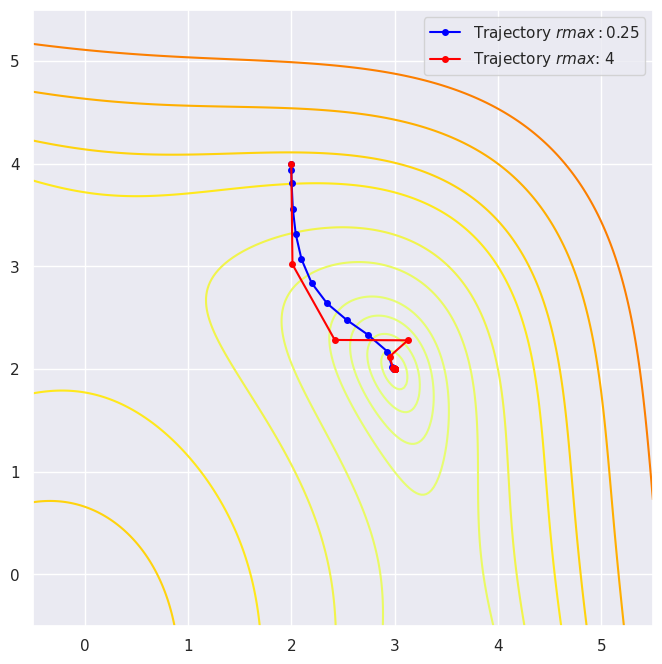

In [12]:
max_iter = 50000 
x0 = np.array([2.0,4.0])
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25

print("Himmelblau function\n")
print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncHimmelblau, opti.grad_fncHimmelblau, opti.hess_fncHimmelblau, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHimmelblau(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncHimmelblau, opti.grad_fncHimmelblau, opti.hess_fncHimmelblau, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHimmelblau(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncHimmelblau, xleft=-0.5, xright=5.5, ybottom=-0.5, ytop=5.5,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk11,r_max1=0.25,list_xk2=list_xk12,r_max2=4)

### Función de Beale
Valor inicial: $\mathbf{x}_0 = (2,3)$  

Beale function

Valor inicial x0	: [2. 3.] 

r_max			: 0.25
Número de iteraciones	: 100
xk			: [2.99998606 0.49999651]
f(xk)			: 3.1144058459688744e-11
||grad_f(x_k)|| 	: 4.343468060129631e-06
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 303
xk			: [2.99997453 0.49999359]
f(xk)			: 1.0406054860005657e-10
||grad_f(x_k)|| 	: 8.270842703951686e-06
Convergencia		: True


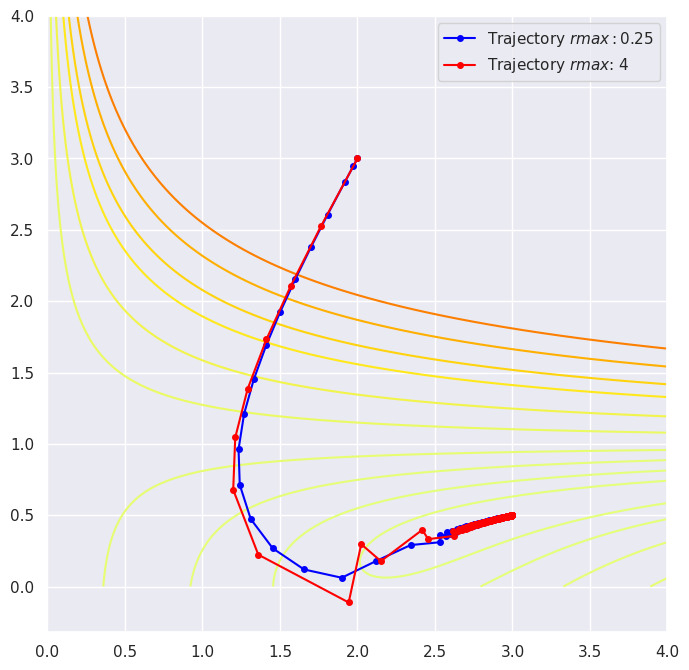

In [13]:
max_iter = 50000 
x0 = np.array([2.0,3.0])
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25

print("Beale function\n")
print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncBeale, opti.grad_fncBeale,opti.hess_fncBeale, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncBeale(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncBeale, opti.grad_fncBeale,opti.hess_fncBeale, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncBeale(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncBeale, xleft=0, xright=4, ybottom=0, ytop=4,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk11,r_max1=0.25,list_xk2=list_xk12,r_max2=4)

### Función de Rosenbrock:
Valores iniciales:
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

Rosenbrock function

Valor inicial x0	: [-1.2  1. ] 

r_max			: 0.25
Número de iteraciones	: 4520
xk			: [0.99999105 0.99998205]
f(xk)			: 8.034677638855621e-11
||grad_f(x_k)|| 	: 8.541653812025233e-06
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 11610
xk			: [0.9999924  0.99998479]
f(xk)			: 5.774600434462599e-11
||grad_f(x_k)|| 	: 8.559425409579205e-06
Convergencia		: True


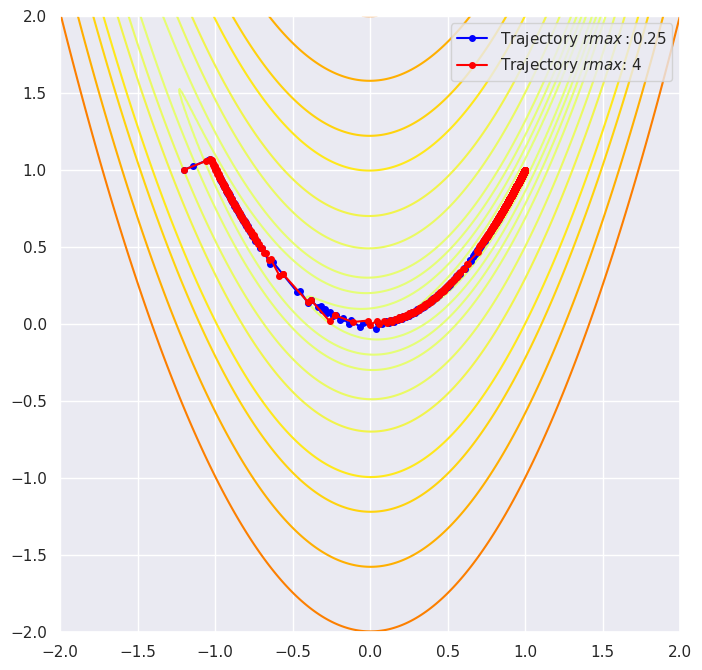

In [14]:
max_iter = 50000 
x0 = np.array([-1.2,1.0])
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25

print("Rosenbrock function\n")
print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

opti.contornosFnc2D(opti.fncRosenbrock, xleft=-2, xright=2, ybottom=-2, ytop=2,
               levels=[0.5,2, 5, 10, 25, 50, 100, 150, 250, 400],list_xk1=list_xk11,r_max1=0.25,list_xk2=list_xk12,r_max2=4)

In [15]:
max_iter = 50000 
x0 = np.array([-1.2,1.0]*5)
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25

print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ] 



r_max			: 0.25
Número de iteraciones	: 17375
xk			: [0.99999995 0.9999999  0.9999998  0.99999959 0.99999919 0.99999837
 0.99999674 0.99999346 0.9999869  0.99997373]
f(xk)			: 2.2906988208353667e-10
||grad_f(x_k)|| 	: 1.9135722397381378e-05
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 18313
xk			: [0.99999995 0.9999999  0.99999981 0.99999962 0.99999924 0.99999846
 0.99999693 0.99999383 0.99998764 0.99997522]
f(xk)			: 2.0387867867192974e-10
||grad_f(x_k)|| 	: 1.9130096453089935e-05
Convergencia		: True


In [16]:
max_iter = 50000 
x0 = np.array([-1.2,1.0]*10)
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25
print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncRosenbrock, opti.grad_fncRosenbrock, opti.hess_fncRosenbrock, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncRosenbrock(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

Valor inicial x0	: [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ] 



r_max			: 0.25
Número de iteraciones	: 19739
xk			: [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999996 0.99999994 0.99999986
 0.99999974 0.99999947 0.99999894 0.99999787 0.99999573 0.99999143
 0.99998282 0.99996555]
f(xk)			: 3.941645681501979e-10
||grad_f(x_k)|| 	: 2.7062039788908604e-05
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 18830
xk			: [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999996 0.99999993 0.99999986
 0.99999972 0.99999943 0.99999887 0.99999773 0.99999546 0.99999089
 0.99998174 0.99996339]
f(xk)			: 4.4505880218707644e-10
||grad_f(x_k)|| 	: 2.7066874570492887e-05
Convergencia		: True


### Función de Hartmann de dimensión 6
Valor inicial: $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [17]:
max_iter = 50000 
x0 = np.zeros(6)
tol = np.sqrt(len(x0))*(np.finfo(float).eps)**(1/3)
r_min = 10**(-5)
eta = 0.25

print("Hartmann function\n")
print("Valor inicial x0\t:",x0,"\n")
r_max = 0.25
k1, xk1, grad_x1, conv1, list_xk11 = trust_region_method(opti.fncHartmann, opti.grad_fncHartmann, opti.hess_Hartmann, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHartmann(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1,"\n")

r_max = 4
k1, xk1, grad_x1, conv1, list_xk12 = trust_region_method(opti.fncHartmann, opti.grad_fncHartmann, opti.hess_Hartmann, x0, max_iter, tol, r_max, r_min, eta)
print("r_max\t\t\t:",r_max)
print("Número de iteraciones\t:",k1)
print("xk\t\t\t:",xk1)
print("f(xk)\t\t\t:",opti.fncHartmann(xk1))
print("||grad_f(x_k)|| \t:",np.linalg.norm(grad_x1))
print("Convergencia\t\t:",conv1)

Hartmann function

Valor inicial x0	: [0. 0. 0. 0. 0. 0.] 

r_max			: 0.25
Número de iteraciones	: 43
xk			: [0.20168973 0.15001056 0.47687325 0.27533248 0.31165146 0.65730054]
f(xk)			: -3.04245773783979
||grad_f(x_k)|| 	: 9.909522300663446e-06
Convergencia		: True 

r_max			: 4
Número de iteraciones	: 42
xk			: [0.20168976 0.15001054 0.47687315 0.27533248 0.31165144 0.65730054]
f(xk)			: -3.042457737838804
||grad_f(x_k)|| 	: 1.1347828196521737e-05
Convergencia		: True
